## Álgebra linear para ciência de dados
### Tarefa da aula 1

#### Trabalho com imagem

In [7]:
#%pip install pillow numpy

In [8]:
from PIL import Image
import numpy as np

Tamanho: (225, 225) | Tipo: RGB


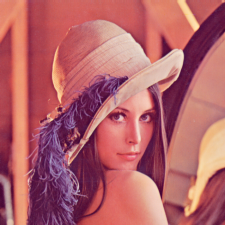

In [9]:
# load as RGB
im = Image.open("lena.png", "r")
im = im.convert("RGB")
print('Tamanho:', im.size, '| Tipo:', im.mode)
im

In [10]:
mtx_colorida = np.array(im)
print('Dimensões:', mtx_colorida.shape)
mtx_colorida

Dimensões: (225, 225, 3)


array([[[226, 137, 126],
        [224, 137, 128],
        [227, 134, 119],
        ...,
        [227, 142, 128],
        [232, 148, 123],
        [213, 119, 103]],

       [[226, 137, 126],
        [224, 137, 128],
        [227, 134, 119],
        ...,
        [227, 141, 128],
        [232, 148, 123],
        [213, 118, 103]],

       [[227, 137, 121],
        [224, 134, 118],
        [227, 134, 117],
        ...,
        [206, 112, 106],
        [191,  98,  96],
        [153,  64,  82]],

       ...,

       [[ 90,  27,  59],
        [ 95,  29,  61],
        [ 96,  28,  63],
        ...,
        [129,  44,  69],
        [148,  58,  73],
        [159,  60,  74]],

       [[ 87,  24,  61],
        [ 92,  26,  61],
        [ 95,  26,  61],
        ...,
        [144,  58,  78],
        [166,  66,  80],
        [168,  64,  78]],

       [[ 84,  23,  58],
        [ 95,  29,  62],
        [ 94,  25,  60],
        ...,
        [159,  66,  83],
        [176,  69,  81],
        [182,  71,  80]]

Ou seja, a imagem colorida é um tensor $225 \times 225 \times 3$,
onde cada elemento $\mathbb{R}^3$ é uma cor RGB, $[r, g, b]$.

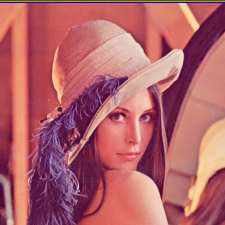

In [11]:
# pintando a primeira linha de vermelho
mtx_colorida[0] = [255, 0, 0]
# segunda de verde
mtx_colorida[1] = [0, 255, 0]
# terceira de azul
mtx_colorida[2] = [0, 0, 255]
# voltando a imagem para o formato PIL
im_col = Image.fromarray(mtx_colorida)
im_col

Vejamos o que acontece quando convertrmos a imagem para branco e preto.

Tamanho: (225, 225) | Tipo: L


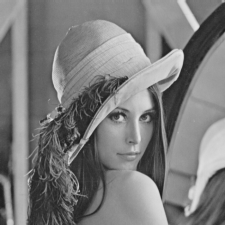

In [12]:
im_bw = im.convert("L")
print('Tamanho:', im_bw.size, '| Tipo:', im_bw.mode)
im_bw

In [13]:
mtx_bw = np.array(im_bw)
print('Dimensões:', mtx_bw.shape)
mtx_bw

Dimensões: (225, 225)


array([[162, 162, 160, ..., 166, 170, 145],
       [162, 162, 160, ..., 165, 170, 145],
       [162, 159, 160, ..., 139, 126,  93],
       ...,
       [ 49,  52,  52, ...,  72,  87,  91],
       [ 47,  50,  51, ...,  86,  97,  97],
       [ 45,  52,  50, ...,  96, 102, 105]], dtype=uint8)

Vemos que agora a imagem é uma matriz propriamente dita, com dimensões $225 \times 225$, com cada elemento sendo uma tonalidade de cinza.

Percebe-se então, claramente, que os elmentos são diretamente comparáveis aos pixels da imagem.

Se pintássemos cara uma das tonalidades, na exata mesma posição que estão na matriz, obteremos a imagem.

#### Trabalho com dados financeiros

In [14]:
#%pip install pandas

In [15]:
import pandas as pd

In [16]:
# https://www.kaggle.com/datasets/camnugent/sandp500
# Exagero! Esse arquivo tem 20MB.
df = pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


Quantas empresas temos?

In [17]:
df['Name'].nunique()

505

Nota: algumas empresas estão no mercado a mais tempo do que outras, e iniciaram em tempos diferentes! Por isso, por vezes não é possível extrair vetores e desta tabela e colocá-los diretamente como colunas de uma matriz. É necessário algum tratamento (colocar 0 é um possibilidade, mas pode não ser o ideal), mas isso já foge ao escopo dessa tarefa.

Façamos um extrator que, dada uma lista de empresas, retorna as linhas da tabela relativas a essas empresas.

In [18]:
# perceba: quantidades diferentes de entradas por empresa!!!
df['Name'].value_counts()

Name
ZTS     1259
AAL     1259
AAPL    1259
AAP     1259
ABBV    1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: count, Length: 505, dtype: int64

In [19]:
empresas_possiveis = df['Name'].unique()

def busca_empresas(lista_nomes):
    for nome in lista_nomes:
        if nome not in empresas_possiveis:
            print(f'Empresa {nome} não encontrada.')
            return None
    return df[df['Name'].isin(lista_nomes)].reset_index(drop=True)

In [20]:
teste_busca = busca_empresas(['AAPL', 'NVDA', 'MSFT', 'NFLX', 'GOOGL'])
teste_busca

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
6290,2018-02-01,238.5200,246.9000,238.0600,240.5000,12980572,NVDA
6291,2018-02-02,237.0000,237.9700,231.1700,233.5200,17961555,NVDA
6292,2018-02-05,227.0000,233.2300,205.0000,213.7000,29130140,NVDA
6293,2018-02-06,204.4000,225.7000,204.0000,225.5800,27870031,NVDA


Aparentemente deu certo. Contemos quantas entradas cada empresa tem.

In [21]:
teste_busca['Name'].value_counts()

Name
AAPL     1259
GOOGL    1259
MSFT     1259
NFLX     1259
NVDA     1259
Name: count, dtype: int64

A mesma quantidade! Neste caso específico, podemos remodelar essas dados para ficarem iguais aos do modelo do livro, por exemplo.

In [22]:
teste_busca['date'].nunique()

1259

(garante que são as mesmas datas pra todas as empresas)

In [23]:
df_remodelado = teste_busca.pivot(index='date', columns='Name', values='close').reset_index()
df_remodelado.columns.name = None
print('Preço de fechamento por empresa')
df_remodelado

Preço de fechamento por empresa


,date,AAPL,GOOGL,MSFT,NFLX,NVDA
0,2013-02-08,67.8542,393.0777,27.55,25.8528,12.37
1,2013-02-11,68.5614,391.6012,27.86,25.4128,12.51
2,2013-02-12,66.8428,390.7403,27.88,25.4214,12.43
3,2013-02-13,66.7156,391.8214,28.03,26.6098,12.37
4,2013-02-14,66.6556,394.3039,28.04,26.7714,12.73
...,...,...,...,...,...,...
1254,2018-02-01,167.7800,1181.5900,94.26,265.0700,240.50
1255,2018-02-02,160.5000,1119.2000,91.78,267.4300,233.52
1256,2018-02-05,156.4900,1062.3900,88.00,254.2600,213.70
1257,2018-02-06,163.0300,1084.4300,91.33,265.7200,225.58


Obtemos um dataset similar ao que o livro sugere.